In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import scipy.io as sio 
import matplotlib.cm as cm
import PyNAFF as pnf

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

In [3]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

# Load initial distributions and plot

In [4]:
MD4224_Bunch=dict();
sio.loadmat('MD4224/mainbunch_-000001.mat', mdict=MD4224_Bunch);

BCMS_Bunch=dict();
sio.loadmat('BCMS/mainbunch_-000001.mat', mdict=BCMS_Bunch);

# Longitudinal Phase Space Plots

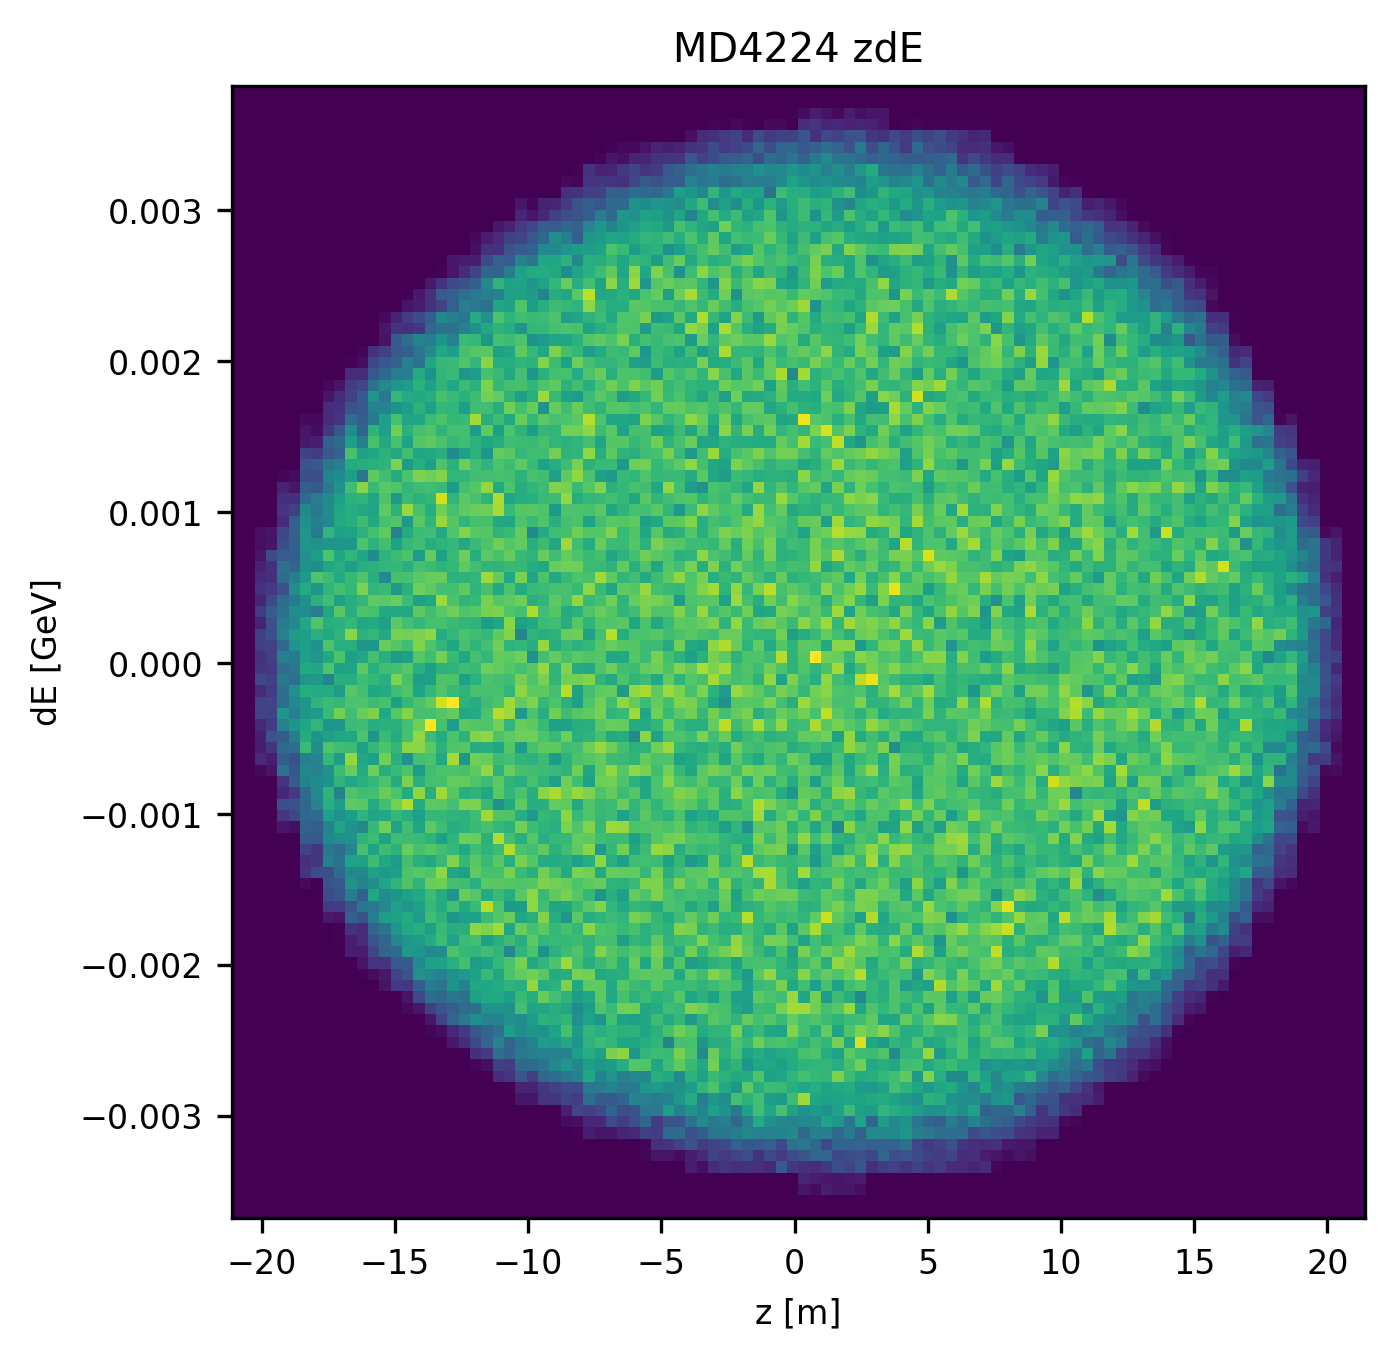

In [5]:
# First we need to make the data into a 2D array

# Start with our data
z = np.array(MD4224_Bunch['particles']['z'][0][0][0])
dE = np.array(MD4224_Bunch['particles']['dE'][0][0][0])

bin_size_x = 100
bin_size_y = 100
x_min = np.min(z)*1.05
x_max = np.max(z)*1.05
y_min = np.min(dE)*1.05
y_max = np.max(dE)*1.05

# Need a heatmap to make a 2D array:
# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='z [m]', ylabel='dE [GeV]', title='MD4224 zdE')

heatmap, xedges, yedges = np.histogram2d(z, dE, bins=(bin_size_x, bin_size_y), range=[[x_min, x_max],[y_min, y_max]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax1.imshow(heatmap, extent=extent, aspect=( (x_min - x_max)/(y_min - y_max) ) )

savename = 'MD4224_zdE_Heatmap.png'
plt.savefig(savename, dpi = 800);

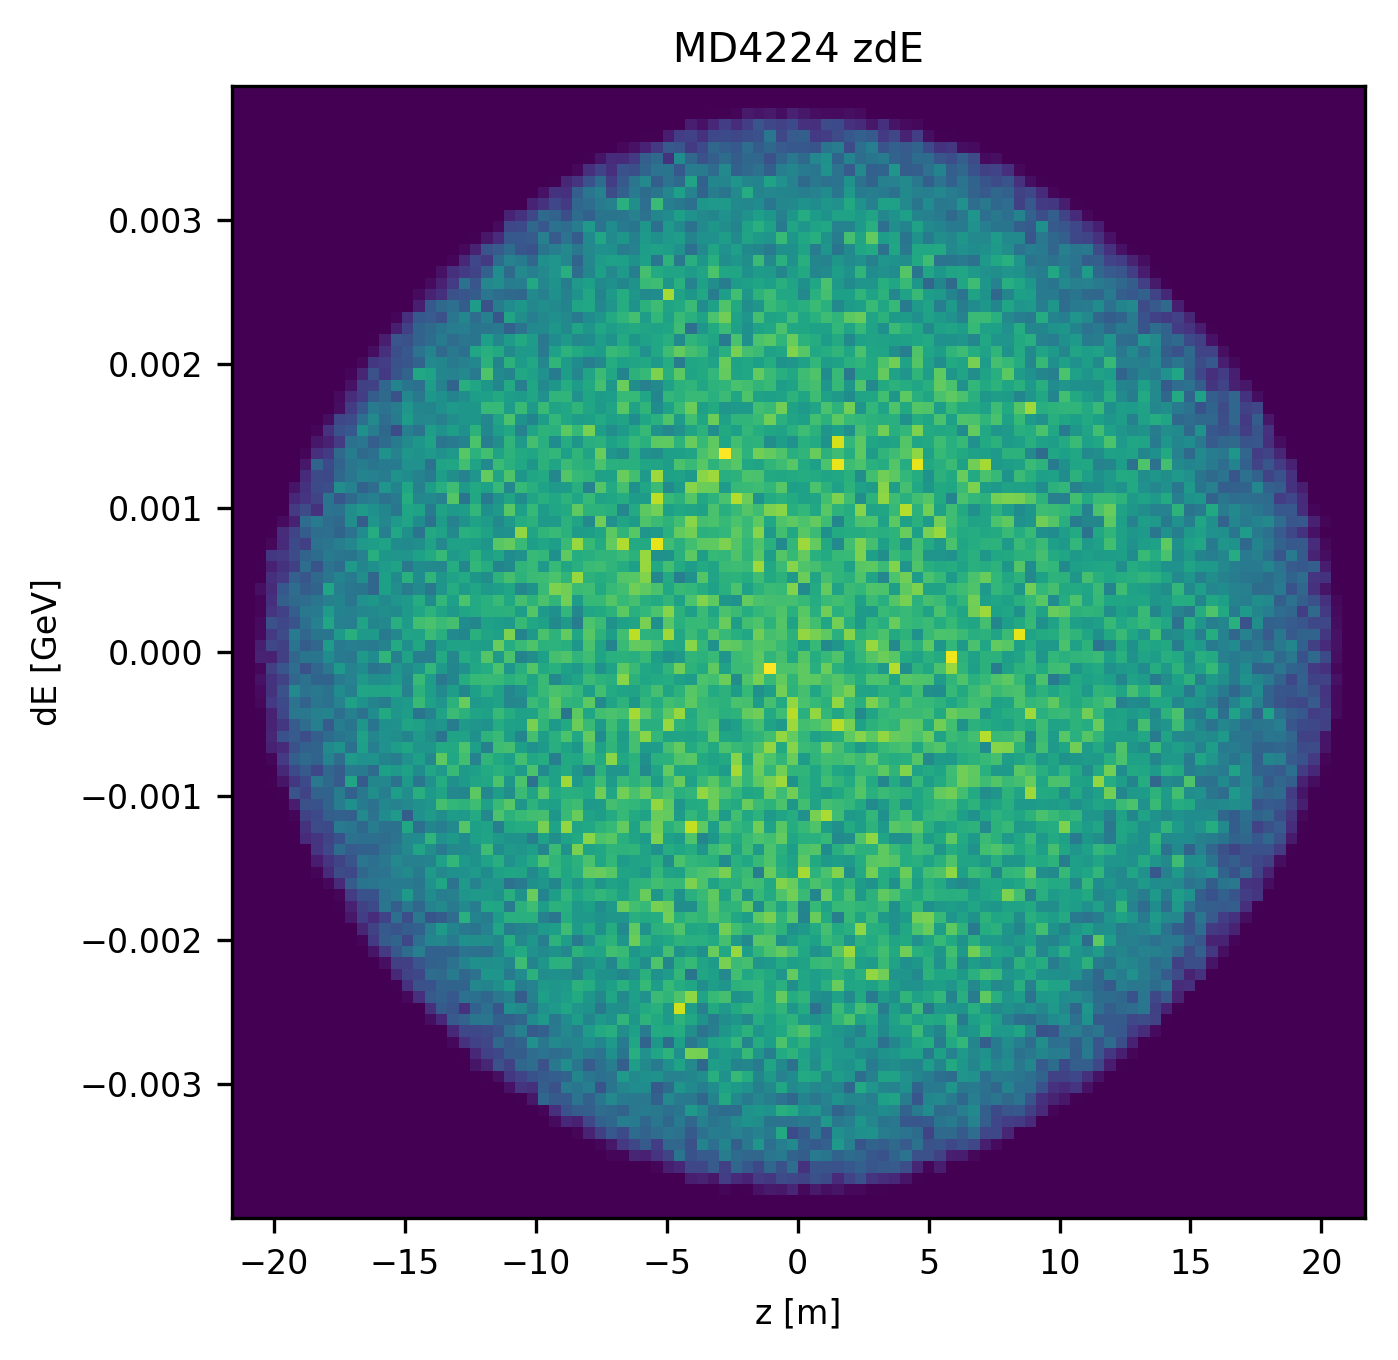

In [6]:
# First we need to make the data into a 2D array

# Start with our data
z2 = np.array(BCMS_Bunch['particles']['z'][0][0][0])
dE2 = np.array(BCMS_Bunch['particles']['dE'][0][0][0])

bin_size_x2 = 100
bin_size_y2 = 100
x_min2 = np.min(z2)*1.05
x_max2 = np.max(z2)*1.05
y_min2 = np.min(dE2)*1.05
y_max2 = np.max(dE2)*1.05

# Need a heatmap to make a 2D array:
# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='z [m]', ylabel='dE [GeV]', title='MD4224 zdE')

heatmap2, xedges2, yedges2 = np.histogram2d(z2, dE2, bins=(bin_size_x2, bin_size_y2), range=[[x_min2, x_max2],[y_min2, y_max2]])
extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]
ax1.imshow(heatmap2, extent=extent2, aspect=( (x_min2 - x_max2)/(y_min2 - y_max2) ) )

savename = 'BCMS_zdE_Heatmap.png'
plt.savefig(savename, dpi = 800);

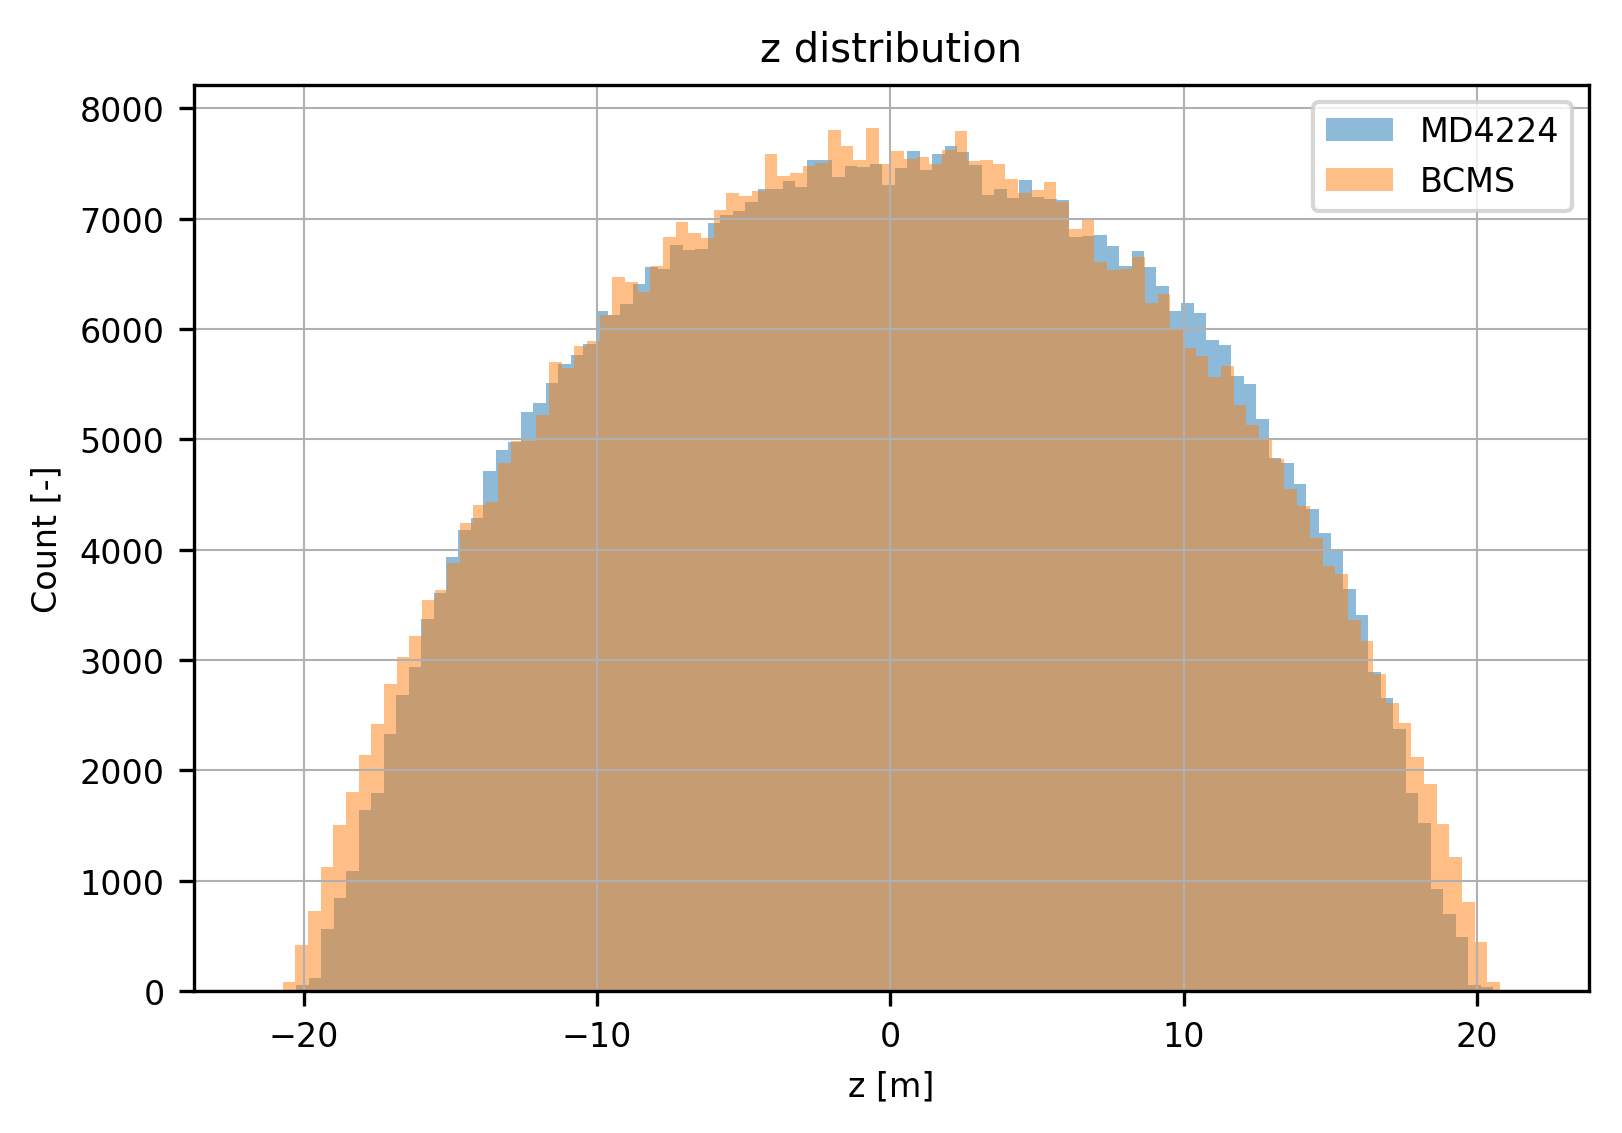

In [8]:
# Check parabolic structure is maintained
plt.rcParams['figure.figsize'] = [6.0, 4.0]

# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

hist, bin_edges = np.histogram(z, bins = bin_size_x, range=[x_min, x_max])
plt.hist(z, bins = bin_size_x, range=[x_min, x_max], alpha = 0.5, label='MD4224')

hist2, bin_edges2 = np.histogram(z2, bins = bin_size_x2, range=[x_min2, x_max2])
plt.hist(z2, bins = bin_size_x2, range=[x_min2, x_max2], alpha = 0.5, label='BCMS')

plt.legend()
plt.grid(linewidth=0.5)

ax1.set(xlabel='z [m]', ylabel='Count [-]', title='z distribution')

savename = 'CF_Hist_z.png'
plt.savefig(savename, dpi = 800);

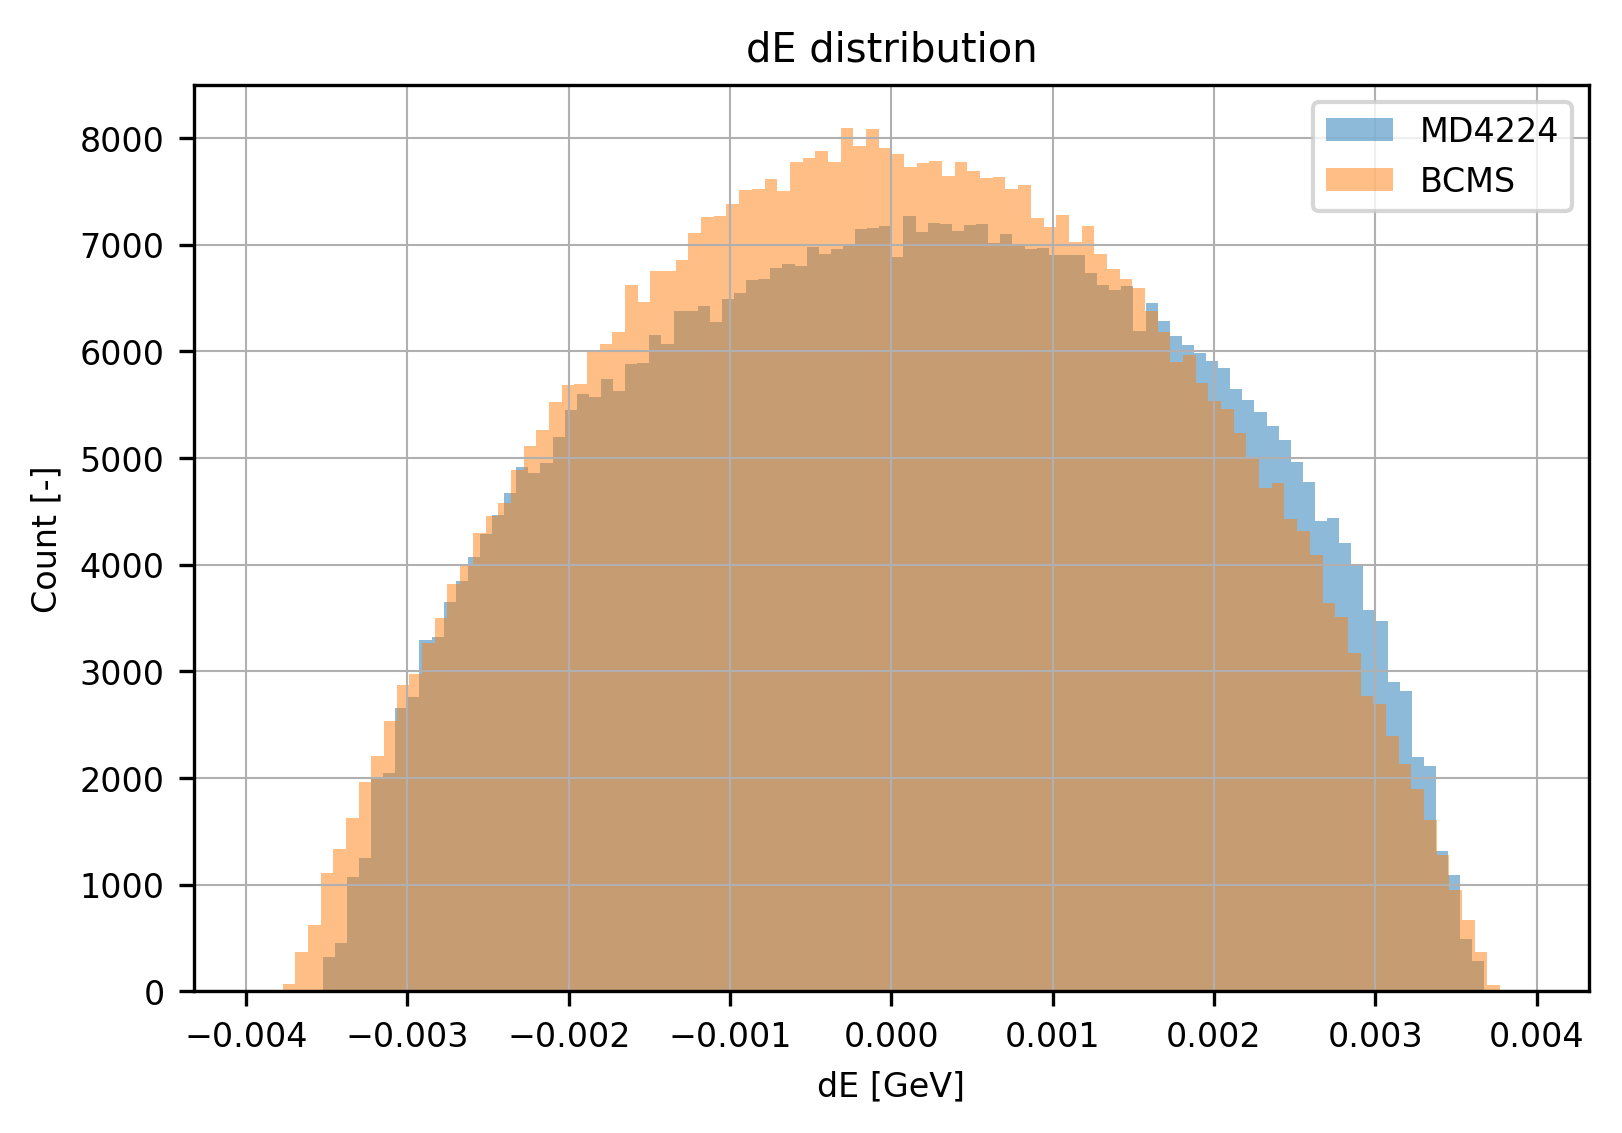

In [10]:
# Check parabolic structure is maintained
plt.rcParams['figure.figsize'] = [6.0, 4.0]

# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

hist, bin_edges = np.histogram(dE, bins = bin_size_y, range=[y_min, y_max])
plt.hist(dE, bins = bin_size_y, range=[y_min, y_max], alpha = 0.5, label='MD4224')

hist2, bin_edges2 = np.histogram(dE2, bins = bin_size_y2, range=[y_min2, y_max2])
plt.hist(dE2, bins = bin_size_y2, range=[y_min2, y_max2], alpha = 0.5, label='BCMS')

plt.legend()
plt.grid(linewidth=0.5)

ax1.set(xlabel='dE [GeV]', ylabel='Count [-]', title='dE distribution')

savename = 'CF_Hist_dE.png'
plt.savefig(savename, dpi = 800);

# Real Space Plot

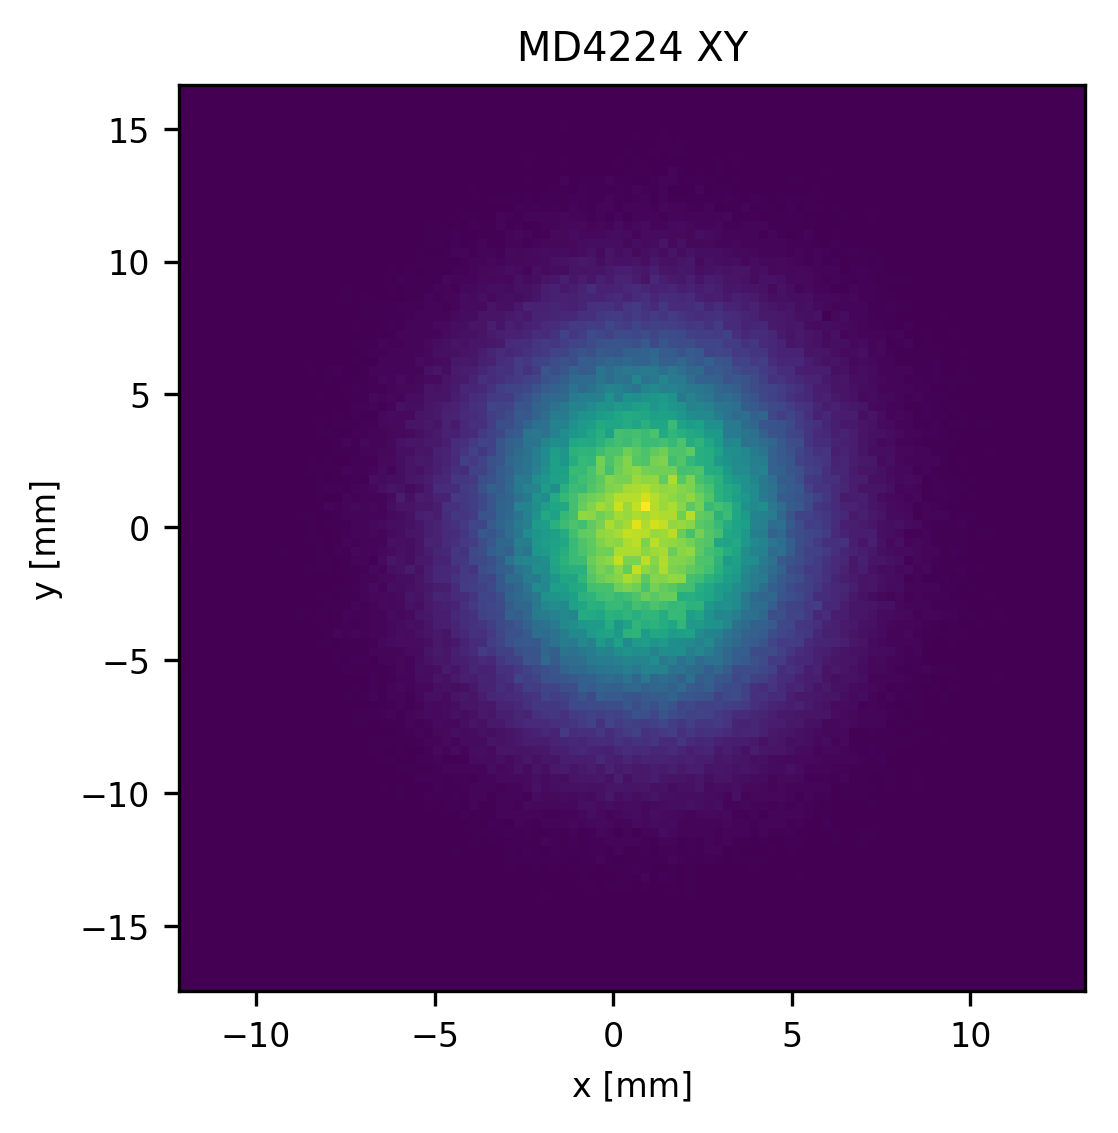

In [11]:
# First we need to make the data into a 2D array

# Start with our data
x = np.array(MD4224_Bunch['particles']['x'][0][0][0]*1E3)
y = np.array(MD4224_Bunch['particles']['y'][0][0][0]*1E3)

bin_size_x = 100
bin_size_y = 100
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)

# Need a heatmap to make a 2D array:
# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='x [mm]', ylabel='y [mm]', title='MD4224 XY')

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(bin_size_x, bin_size_y), range=[[x_min, x_max],[y_min, y_max]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax1.imshow(heatmap, extent=extent, aspect=( (x_min - x_max)/(y_min - y_max) ) )

savename = 'MD4224_XY_Heatmap.png'
plt.savefig(savename, dpi = 800);

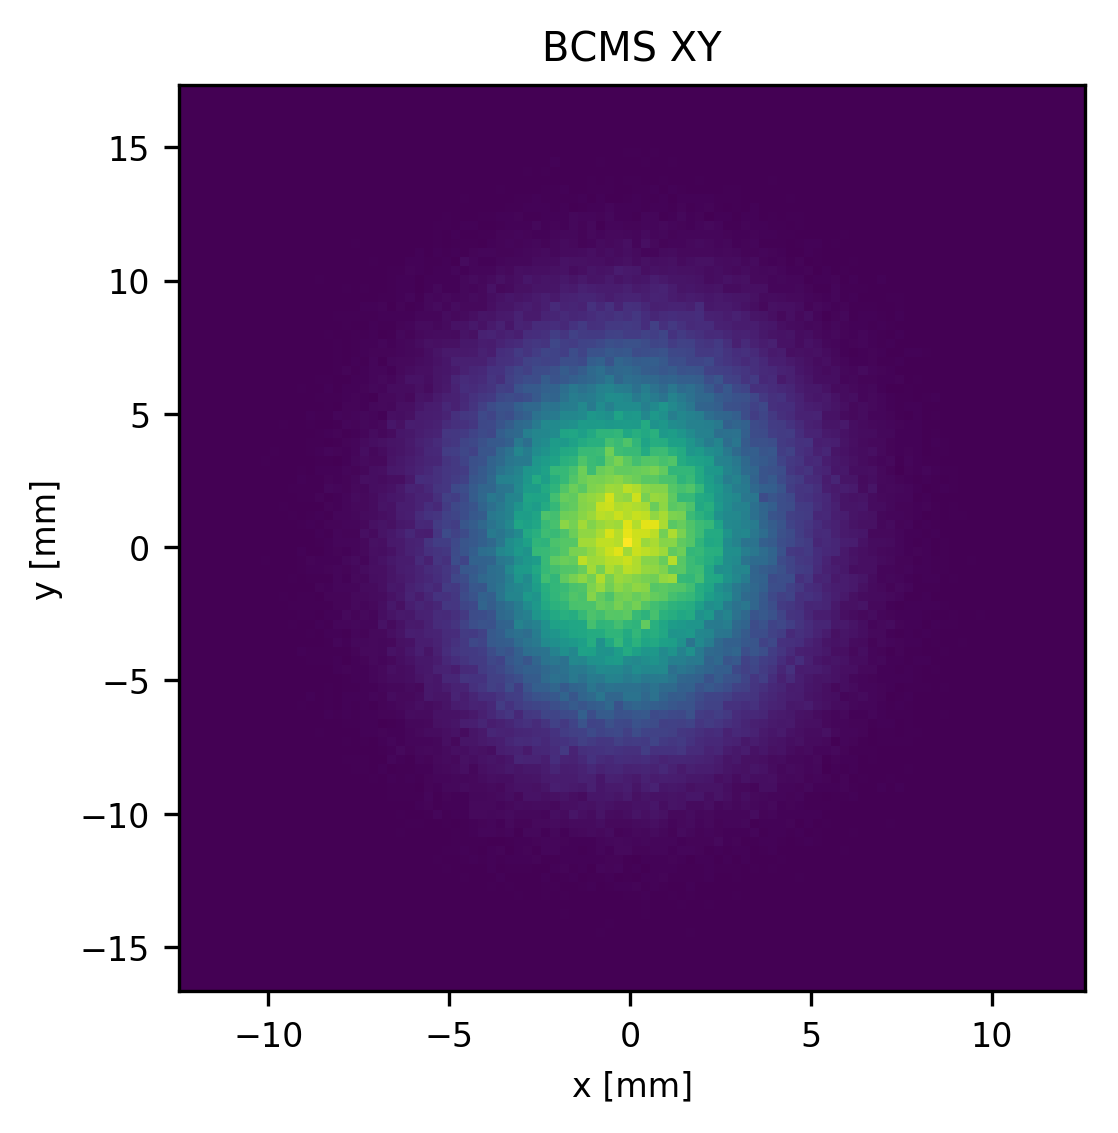

In [12]:
# First we need to make the data into a 2D array

# Start with our data
x2 = np.array(BCMS_Bunch['particles']['x'][0][0][0]*1E3)
y2 = np.array(BCMS_Bunch['particles']['y'][0][0][0]*1E3)

bin_size_x2 = 100
bin_size_y2 = 100
x_min2 = np.min(x2)
x_max2 = np.max(x2)
y_min2 = np.min(y2)
y_max2 = np.max(y2)

# Need a heatmap to make a 2D array:
# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='x [mm]', ylabel='y [mm]', title='BCMS XY')

heatmap2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=(bin_size_x2, bin_size_y2), range=[[x_min2, x_max2],[y_min2, y_max2]])
extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]
ax1.imshow(heatmap2, extent=extent2, aspect=( (x_min2 - x_max2)/(y_min2 - y_max2) ) )

savename = 'BCMS_XY_Heatmap.png'
plt.savefig(savename, dpi = 800);

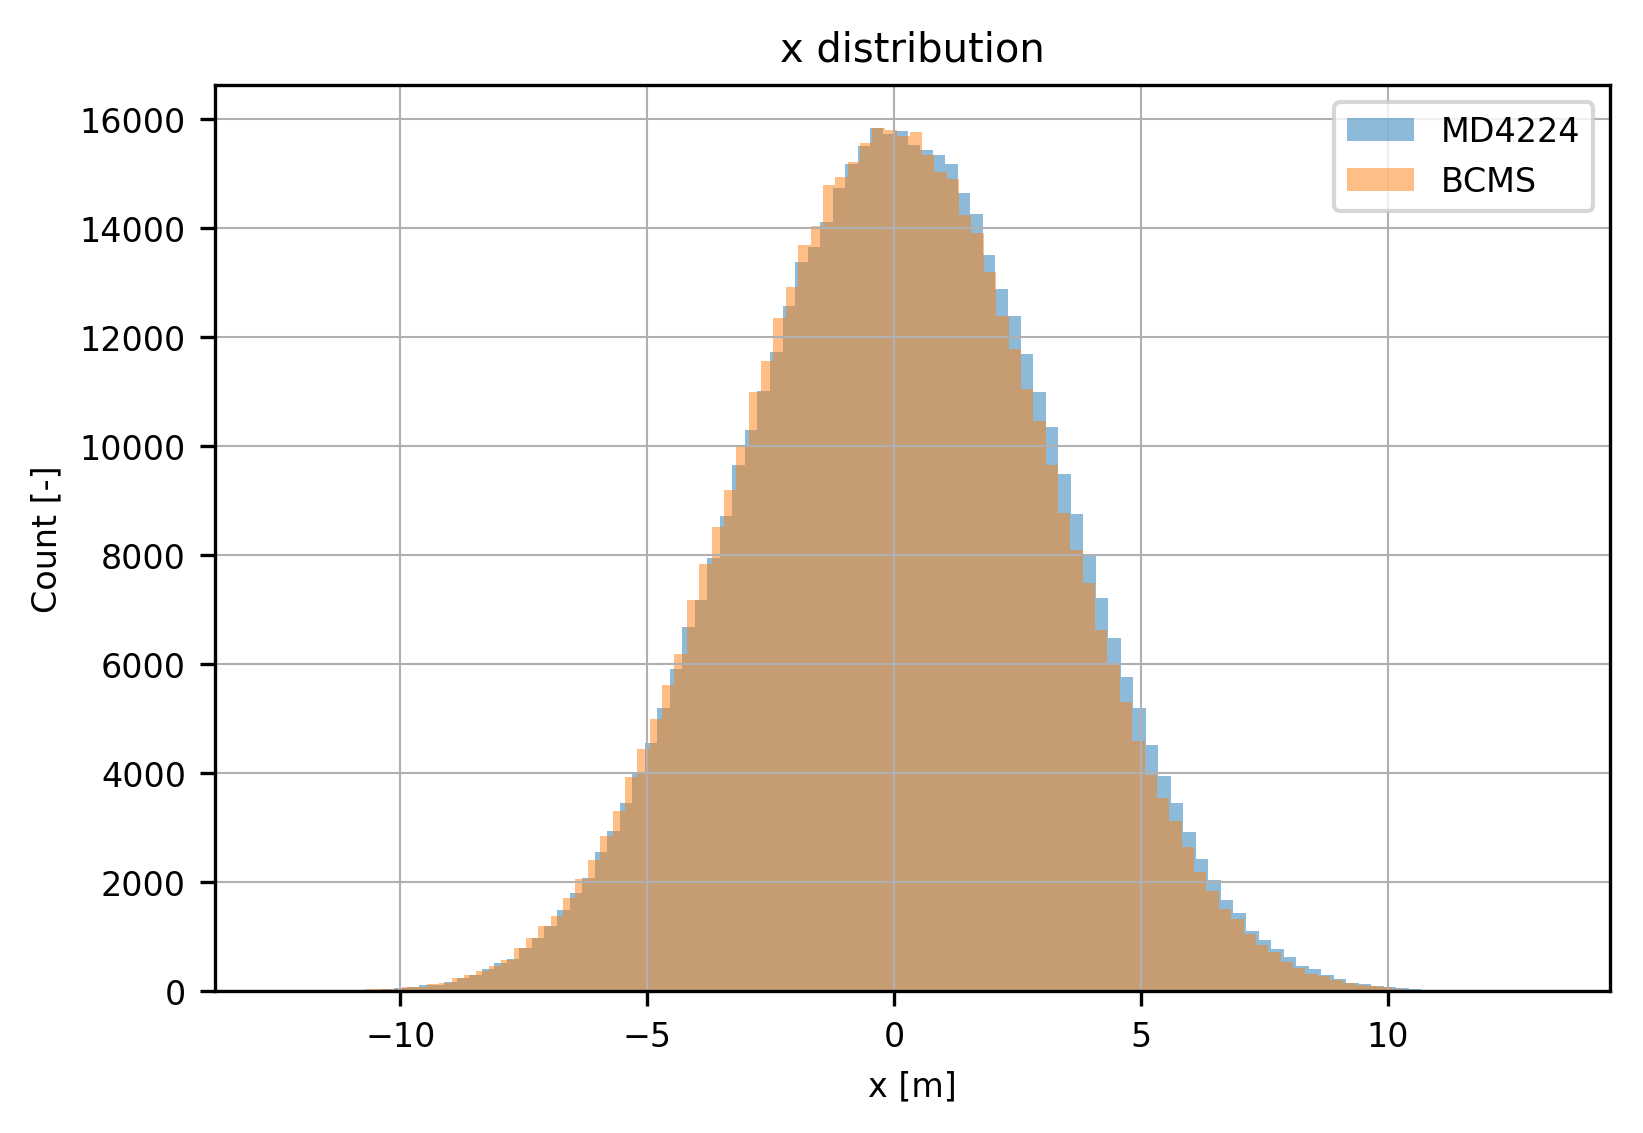

In [13]:
# Check parabolic structure is maintained
plt.rcParams['figure.figsize'] = [6.0, 4.0]

# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

hist, bin_edges = np.histogram(x, bins = bin_size_x, range=[x_min, x_max])
plt.hist(x, bins = bin_size_x, range=[x_min, x_max], alpha = 0.5, label='MD4224')

hist2, bin_edges2 = np.histogram(x2, bins = bin_size_x2, range=[x_min2, x_max2])
plt.hist(x2, bins = bin_size_x2, range=[x_min2, x_max2], alpha = 0.5, label='BCMS')

plt.legend()
plt.grid(linewidth=0.5)

ax1.set(xlabel='x [m]', ylabel='Count [-]', title='x distribution')

savename = 'CF_Hist_x.png'
plt.savefig(savename, dpi = 800);

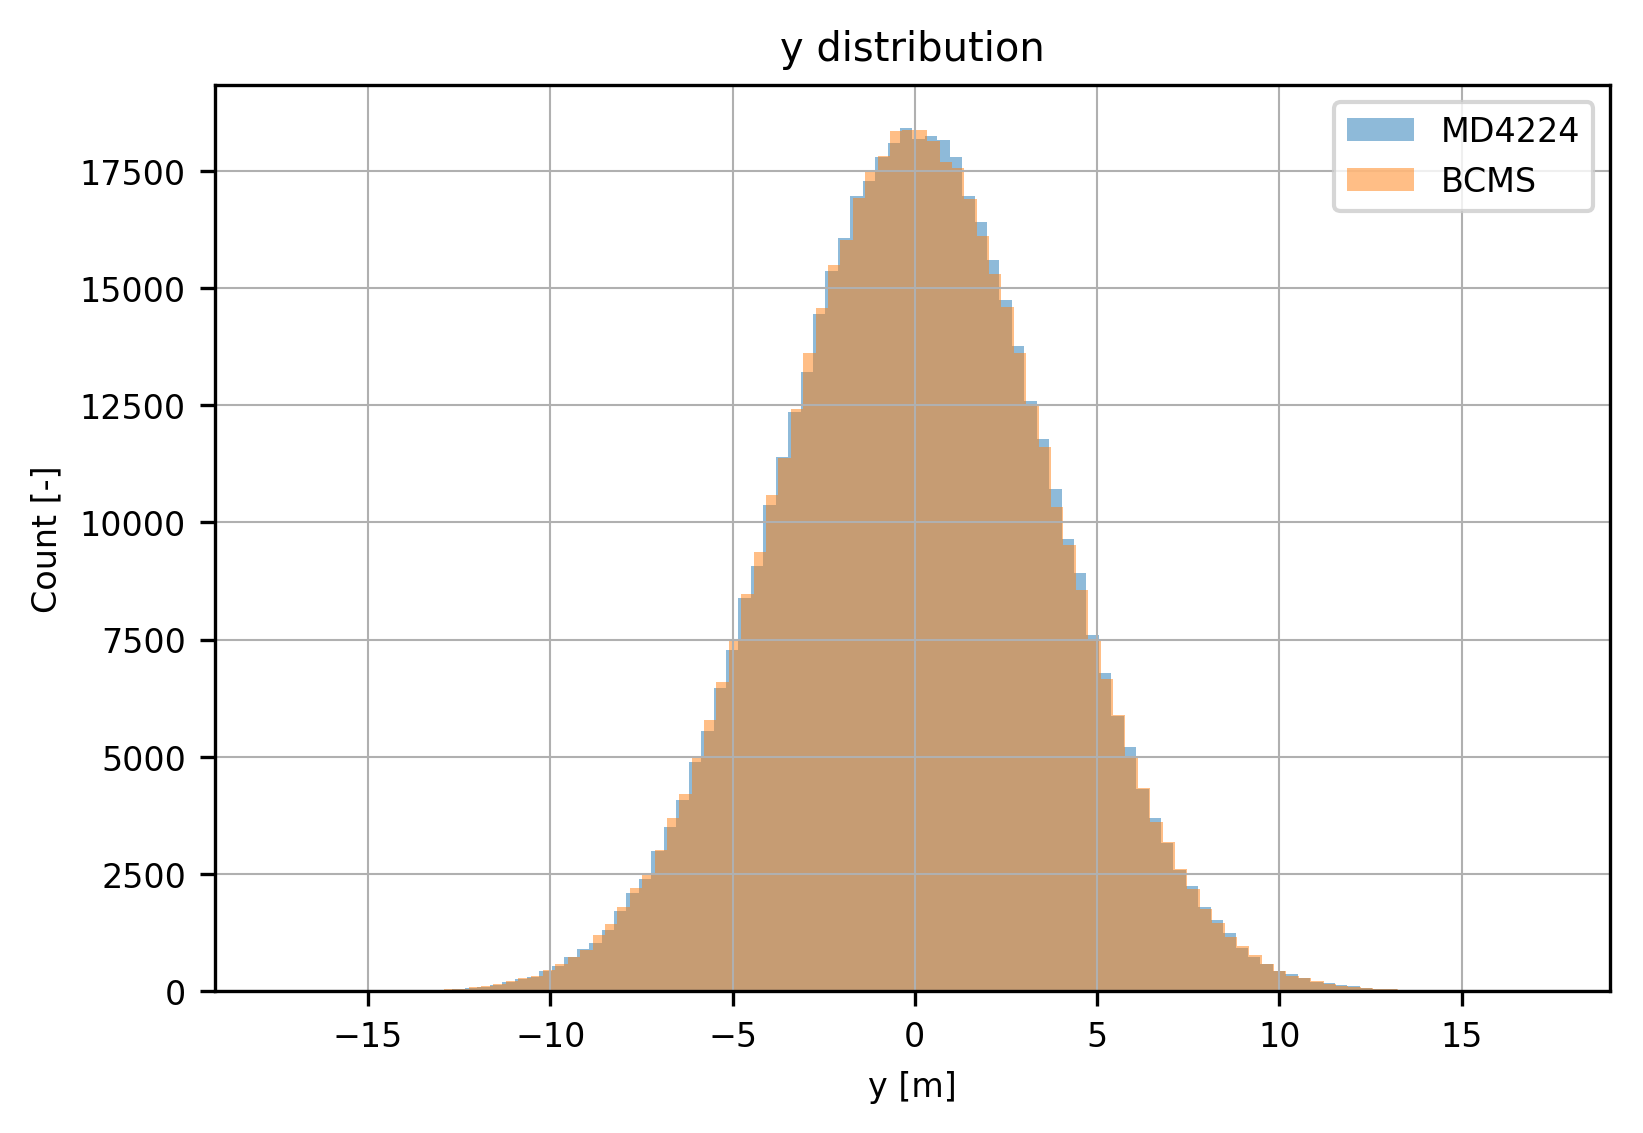

In [14]:
# Check parabolic structure is maintained
plt.rcParams['figure.figsize'] = [6.0, 4.0]

# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

hist, bin_edges = np.histogram(y, bins = bin_size_y, range=[y_min, y_max])
plt.hist(y, bins = bin_size_y, range=[y_min, y_max], alpha = 0.5, label='MD4224')

hist2, bin_edges2 = np.histogram(y2, bins = bin_size_y2, range=[y_min2, y_max2])
plt.hist(y2, bins = bin_size_y2, range=[y_min2, y_max2], alpha = 0.5, label='BCMS')

plt.legend()
plt.grid(linewidth=0.5)

ax1.set(xlabel='y [m]', ylabel='Count [-]', title='y distribution')

savename = 'CF_Hist_y.png'
plt.savefig(savename, dpi = 800);

# x phase space Plots

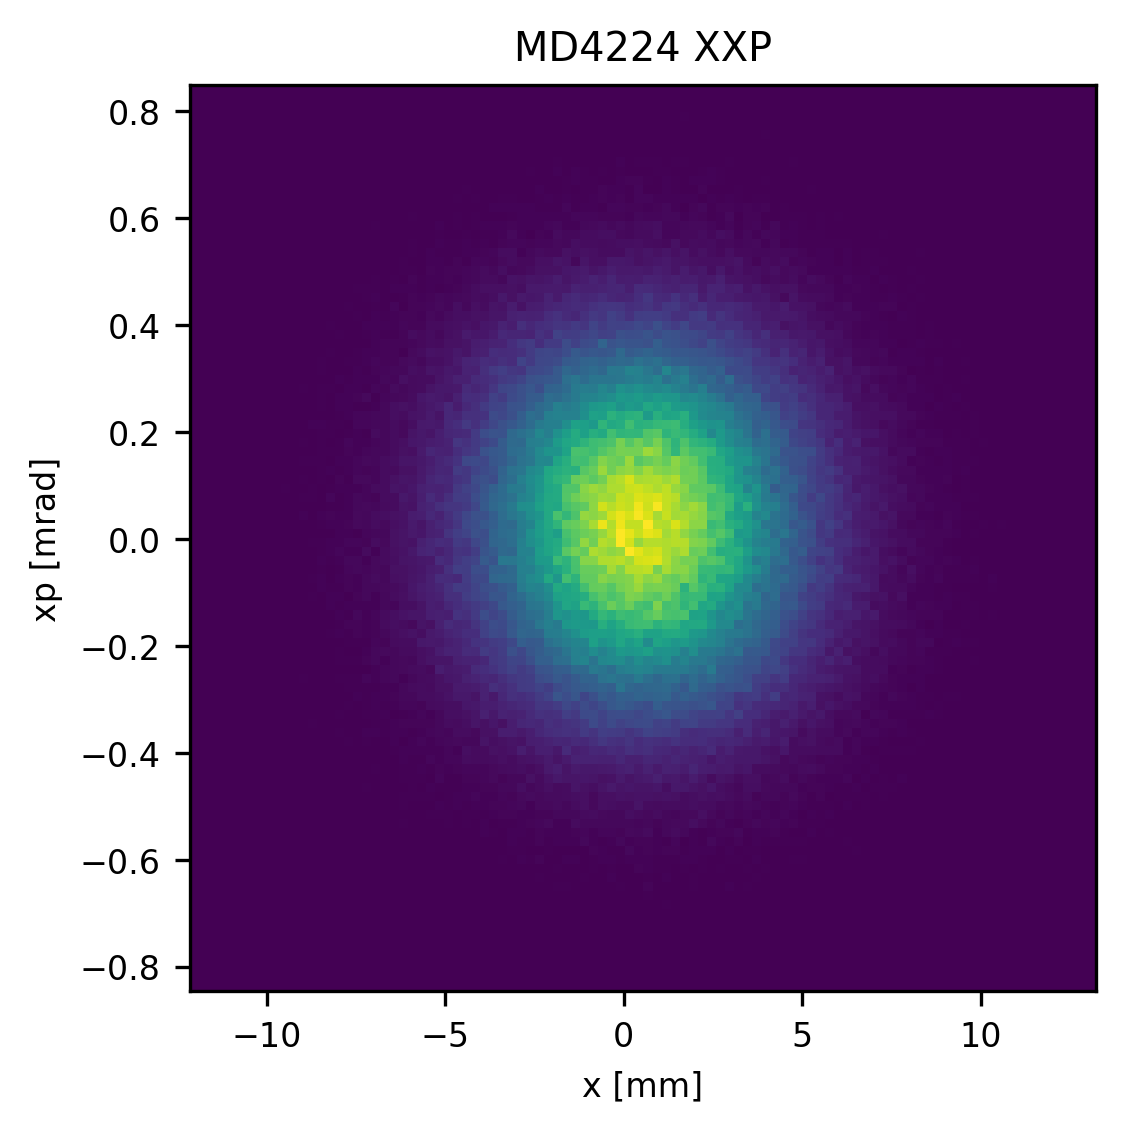

In [15]:
# First we need to make the data into a 2D array

# Start with our data
x = np.array(MD4224_Bunch['particles']['x'][0][0][0]*1E3)
y = np.array(MD4224_Bunch['particles']['xp'][0][0][0]*1E3)

bin_size_x = 100
bin_size_y = 100
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)

# Need a heatmap to make a 2D array:
# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='x [mm]', ylabel='xp [mrad]', title='MD4224 XXP')

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(bin_size_x, bin_size_y), range=[[x_min, x_max],[y_min, y_max]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax1.imshow(heatmap, extent=extent, aspect=( (x_min - x_max)/(y_min - y_max) ) )

savename = 'MD4224_XXP_Heatmap.png'
plt.savefig(savename, dpi = 800);

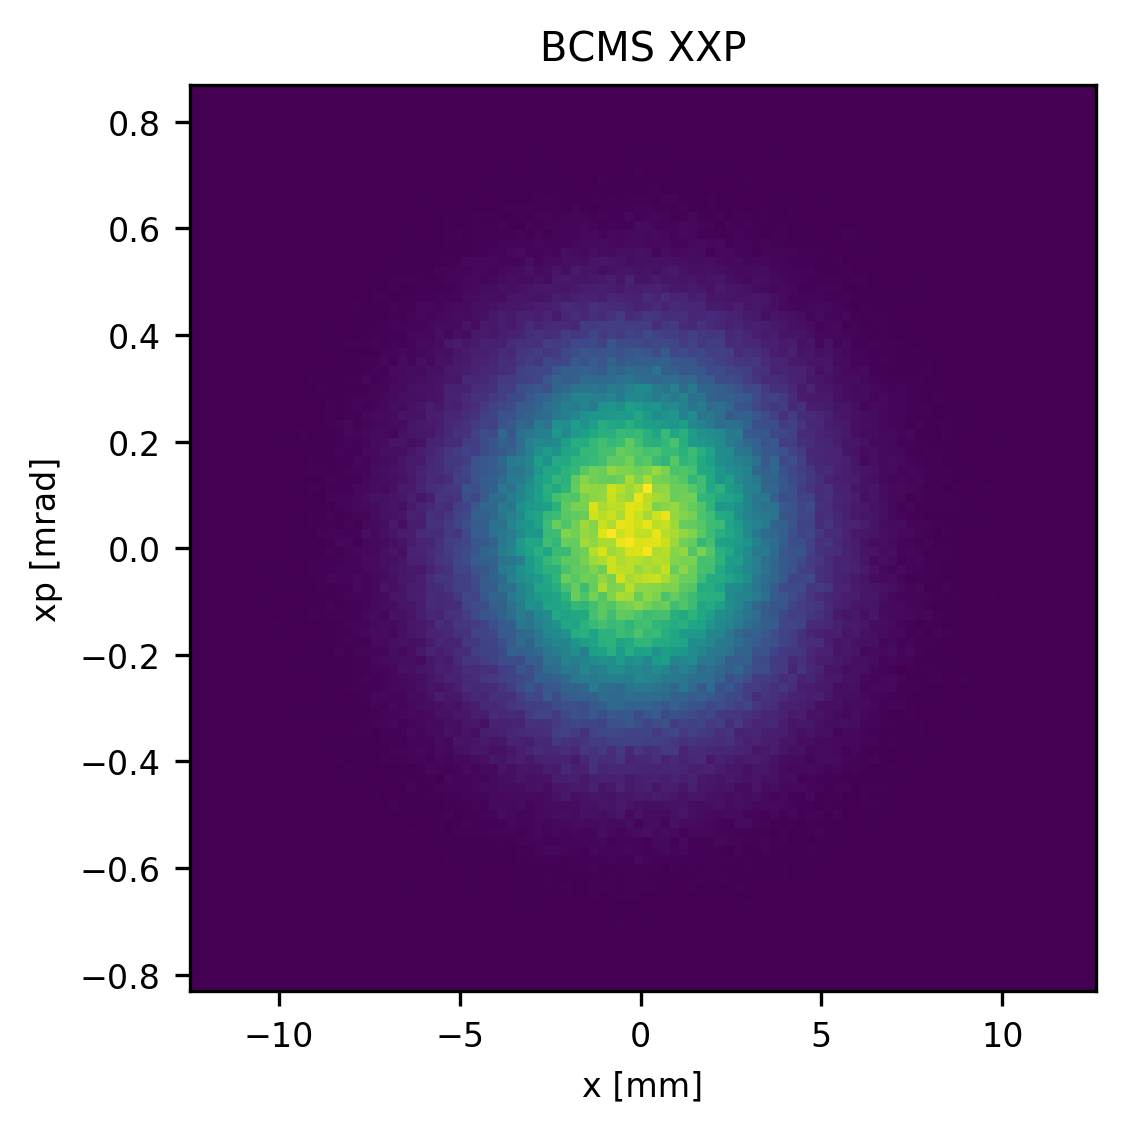

In [16]:
# First we need to make the data into a 2D array

# Start with our data
x2 = np.array(BCMS_Bunch['particles']['x'][0][0][0]*1E3)
y2 = np.array(BCMS_Bunch['particles']['xp'][0][0][0]*1E3)

bin_size_x2 = 100
bin_size_y2 = 100
x_min2 = np.min(x2)
x_max2 = np.max(x2)
y_min2 = np.min(y2)
y_max2 = np.max(y2)

# Need a heatmap to make a 2D array:
# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='x [mm]', ylabel='xp [mrad]', title='BCMS XXP')

heatmap2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=(bin_size_x2, bin_size_y2), range=[[x_min2, x_max2],[y_min2, y_max2]])
extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]
ax1.imshow(heatmap2, extent=extent2, aspect=( (x_min2 - x_max2)/(y_min2 - y_max2) ) )

savename = 'BCMS_XXP_Heatmap.png'
plt.savefig(savename, dpi = 800);

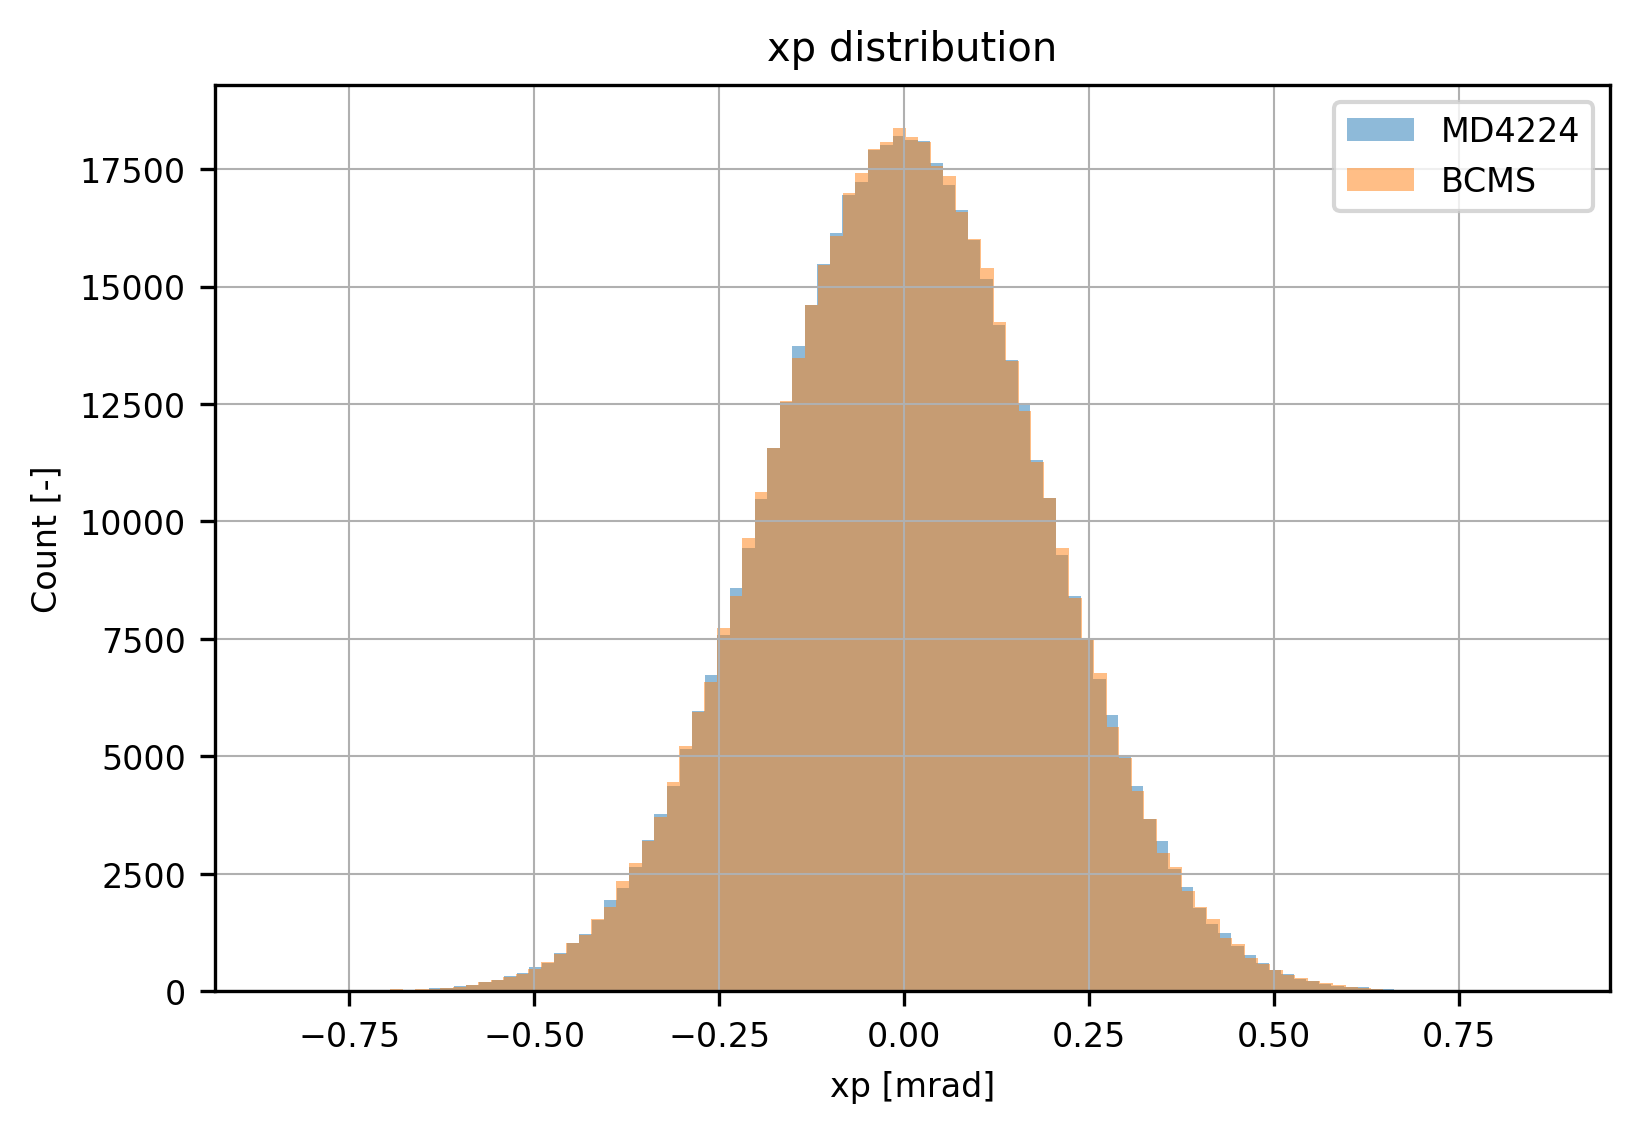

In [17]:
# Check parabolic structure is maintained
plt.rcParams['figure.figsize'] = [6.0, 4.0]

# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

hist, bin_edges = np.histogram(y, bins = bin_size_y, range=[y_min, y_max])
plt.hist(y, bins = bin_size_y, range=[y_min, y_max], alpha = 0.5, label='MD4224')

hist2, bin_edges2 = np.histogram(y2, bins = bin_size_y2, range=[y_min2, y_max2])
plt.hist(y2, bins = bin_size_y2, range=[y_min2, y_max2], alpha = 0.5, label='BCMS')

plt.legend()
plt.grid(linewidth=0.5)

ax1.set(xlabel='xp [mrad]', ylabel='Count [-]', title='xp distribution')

savename = 'CF_Hist_xp.png'
plt.savefig(savename, dpi = 800);

# y phase space plots

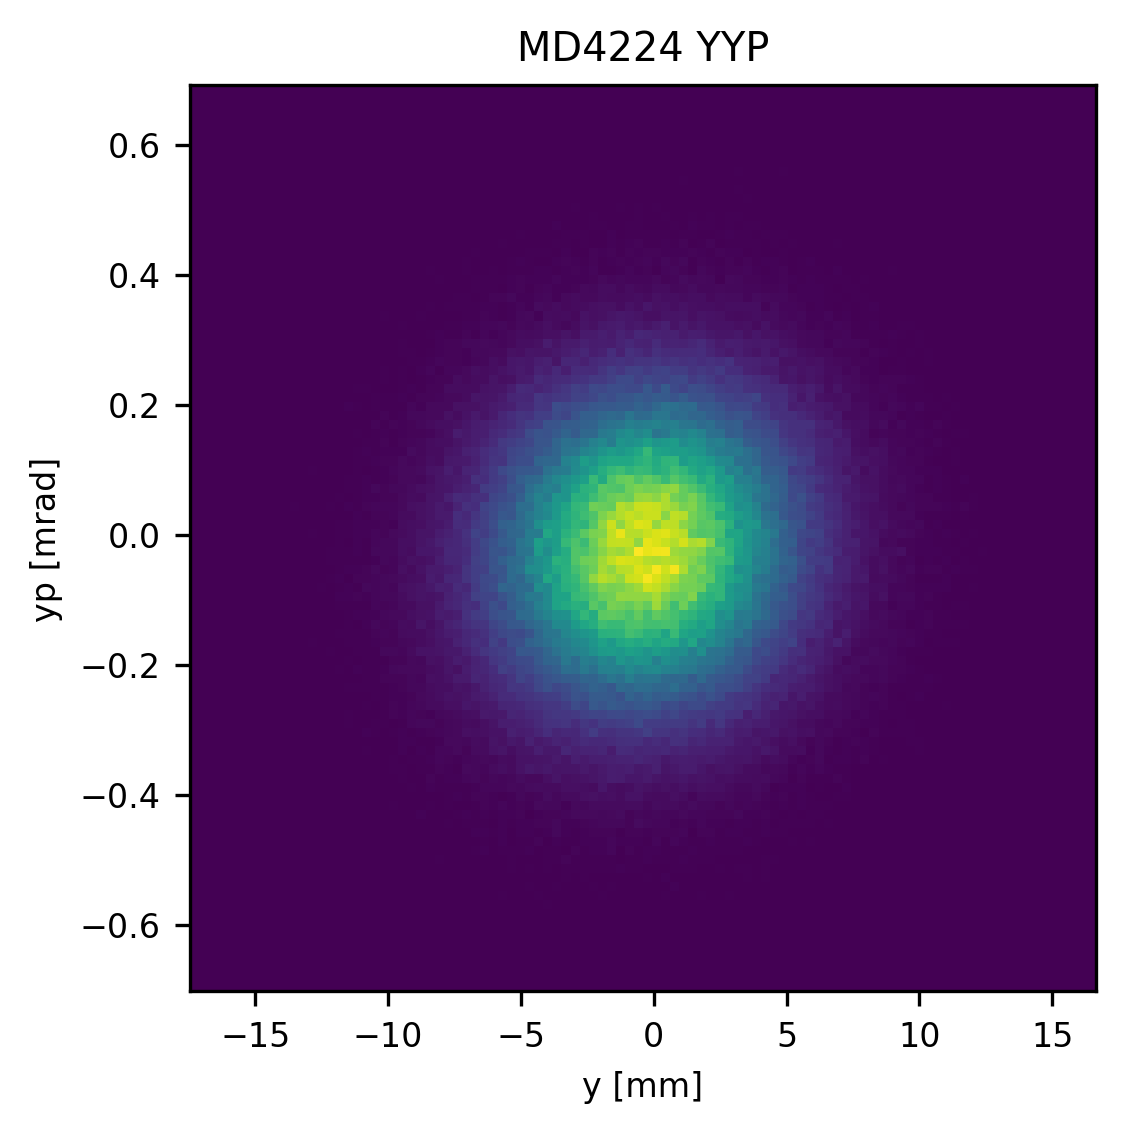

In [19]:
# Start with our data
x = np.array(MD4224_Bunch['particles']['y'][0][0][0]*1E3)
y = np.array(MD4224_Bunch['particles']['yp'][0][0][0]*1E3)

bin_size_x = 100
bin_size_y = 100
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)

# Need a heatmap to make a 2D array:
# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='y [mm]', ylabel='yp [mrad]', title='MD4224 YYP')

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(bin_size_x, bin_size_y), range=[[x_min, x_max],[y_min, y_max]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax1.imshow(heatmap, extent=extent, aspect=( (x_min - x_max)/(y_min - y_max) ) )

savename = 'MD4224_YYP_Heatmap.png'
plt.savefig(savename, dpi = 800);

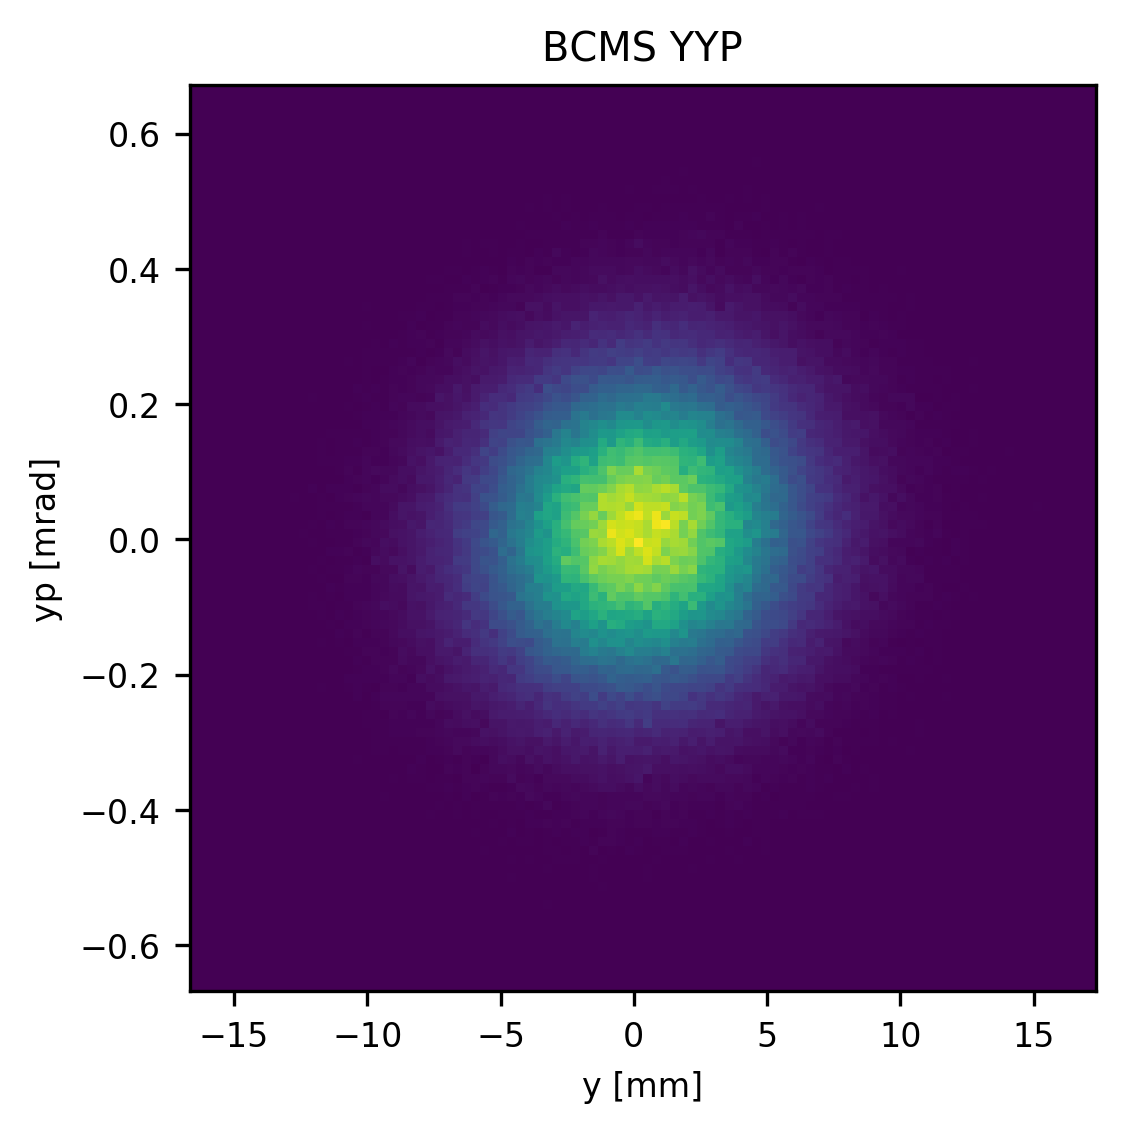

In [20]:
# Start with our data
x2 = np.array(BCMS_Bunch['particles']['y'][0][0][0]*1E3)
y2 = np.array(BCMS_Bunch['particles']['yp'][0][0][0]*1E3)

bin_size_x2 = 100
bin_size_y2 = 100
x_min2 = np.min(x2)
x_max2 = np.max(x2)
y_min2 = np.min(y2)
y_max2 = np.max(y2)

# Need a heatmap to make a 2D array:
# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='y [mm]', ylabel='yp [mrad]', title='BCMS YYP')

heatmap2, xedges2, yedges2 = np.histogram2d(x2, y2, bins=(bin_size_x2, bin_size_y2), range=[[x_min2, x_max2],[y_min2, y_max2]])
extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]
ax1.imshow(heatmap2, extent=extent2, aspect=( (x_min2 - x_max2)/(y_min2 - y_max2) ) )

savename = 'BCMS_YYP_Heatmap.png'
plt.savefig(savename, dpi = 800);

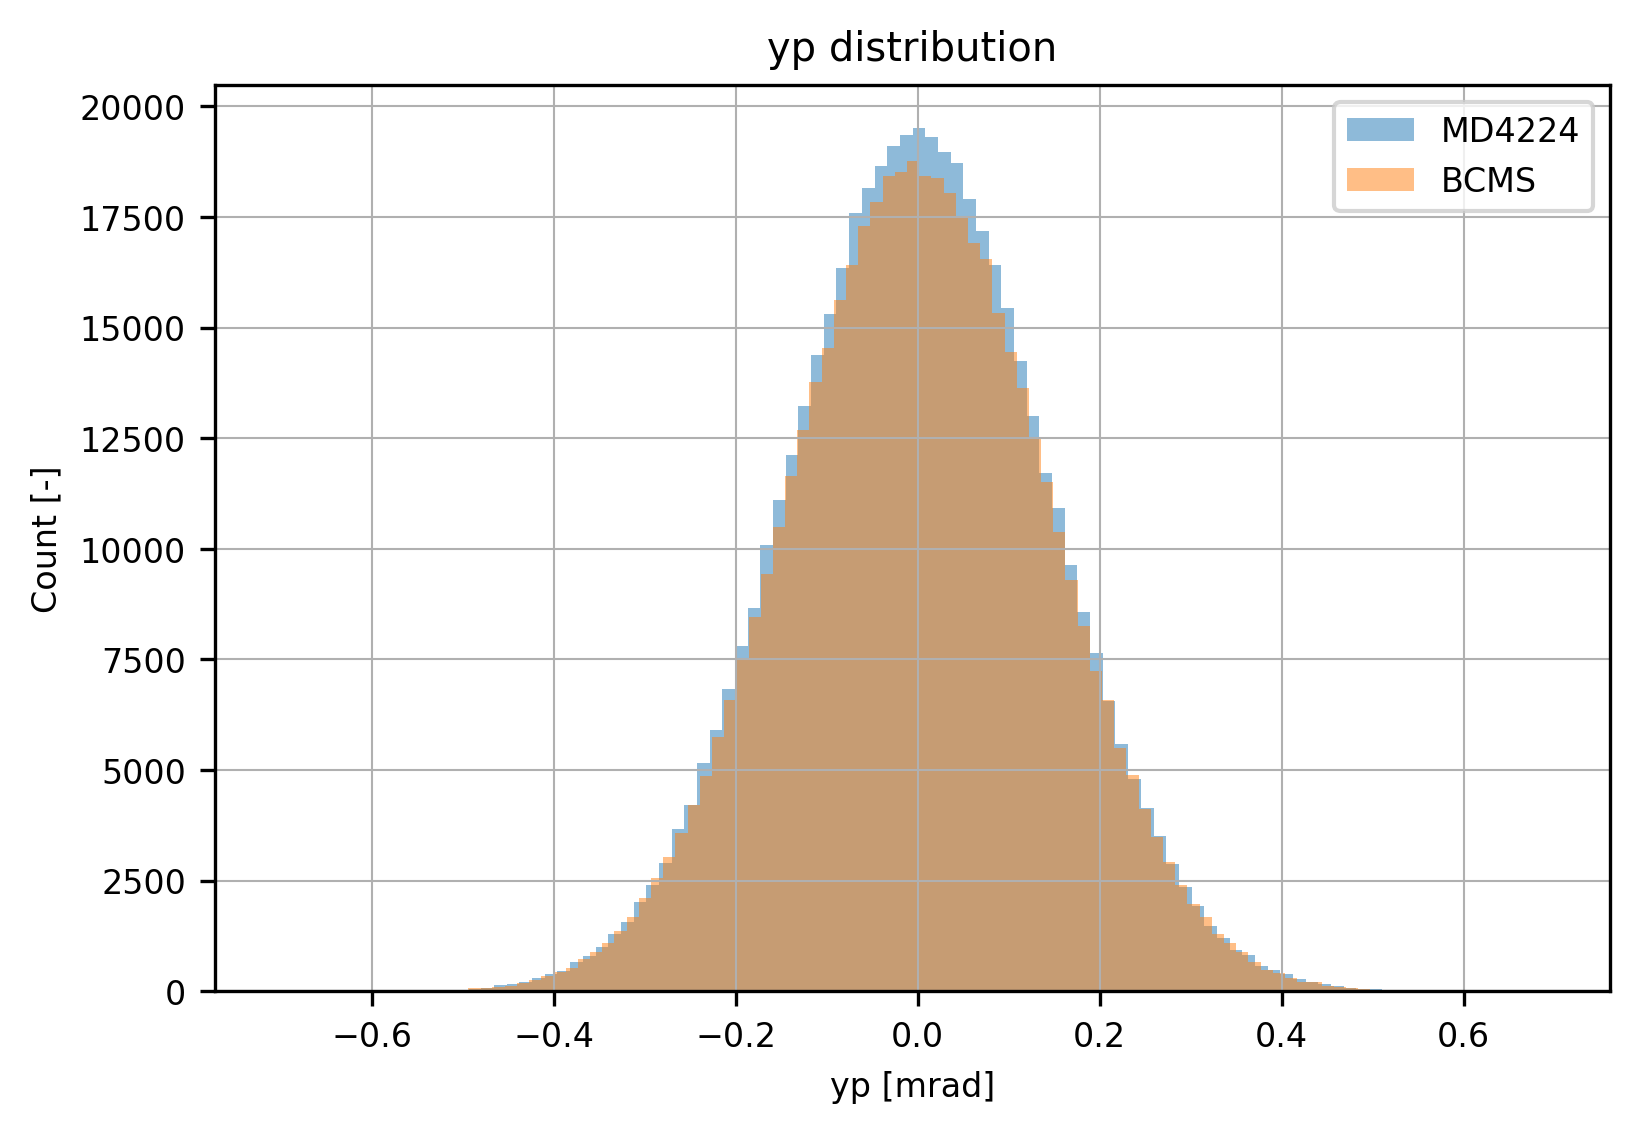

In [21]:
# Check parabolic structure is maintained
plt.rcParams['figure.figsize'] = [6.0, 4.0]

# Create heatmap
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

hist, bin_edges = np.histogram(y, bins = bin_size_y, range=[y_min, y_max])
plt.hist(y, bins = bin_size_y, range=[y_min, y_max], alpha = 0.5, label='MD4224')

hist2, bin_edges2 = np.histogram(y2, bins = bin_size_y2, range=[y_min2, y_max2])
plt.hist(y2, bins = bin_size_y2, range=[y_min2, y_max2], alpha = 0.5, label='BCMS')

plt.legend()
plt.grid(linewidth=0.5)

ax1.set(xlabel='yp [mrad]', ylabel='Count [-]', title='yp distribution')

savename = 'CF_Hist_yp.png'
plt.savefig(savename, dpi = 800);

# Simple scatter

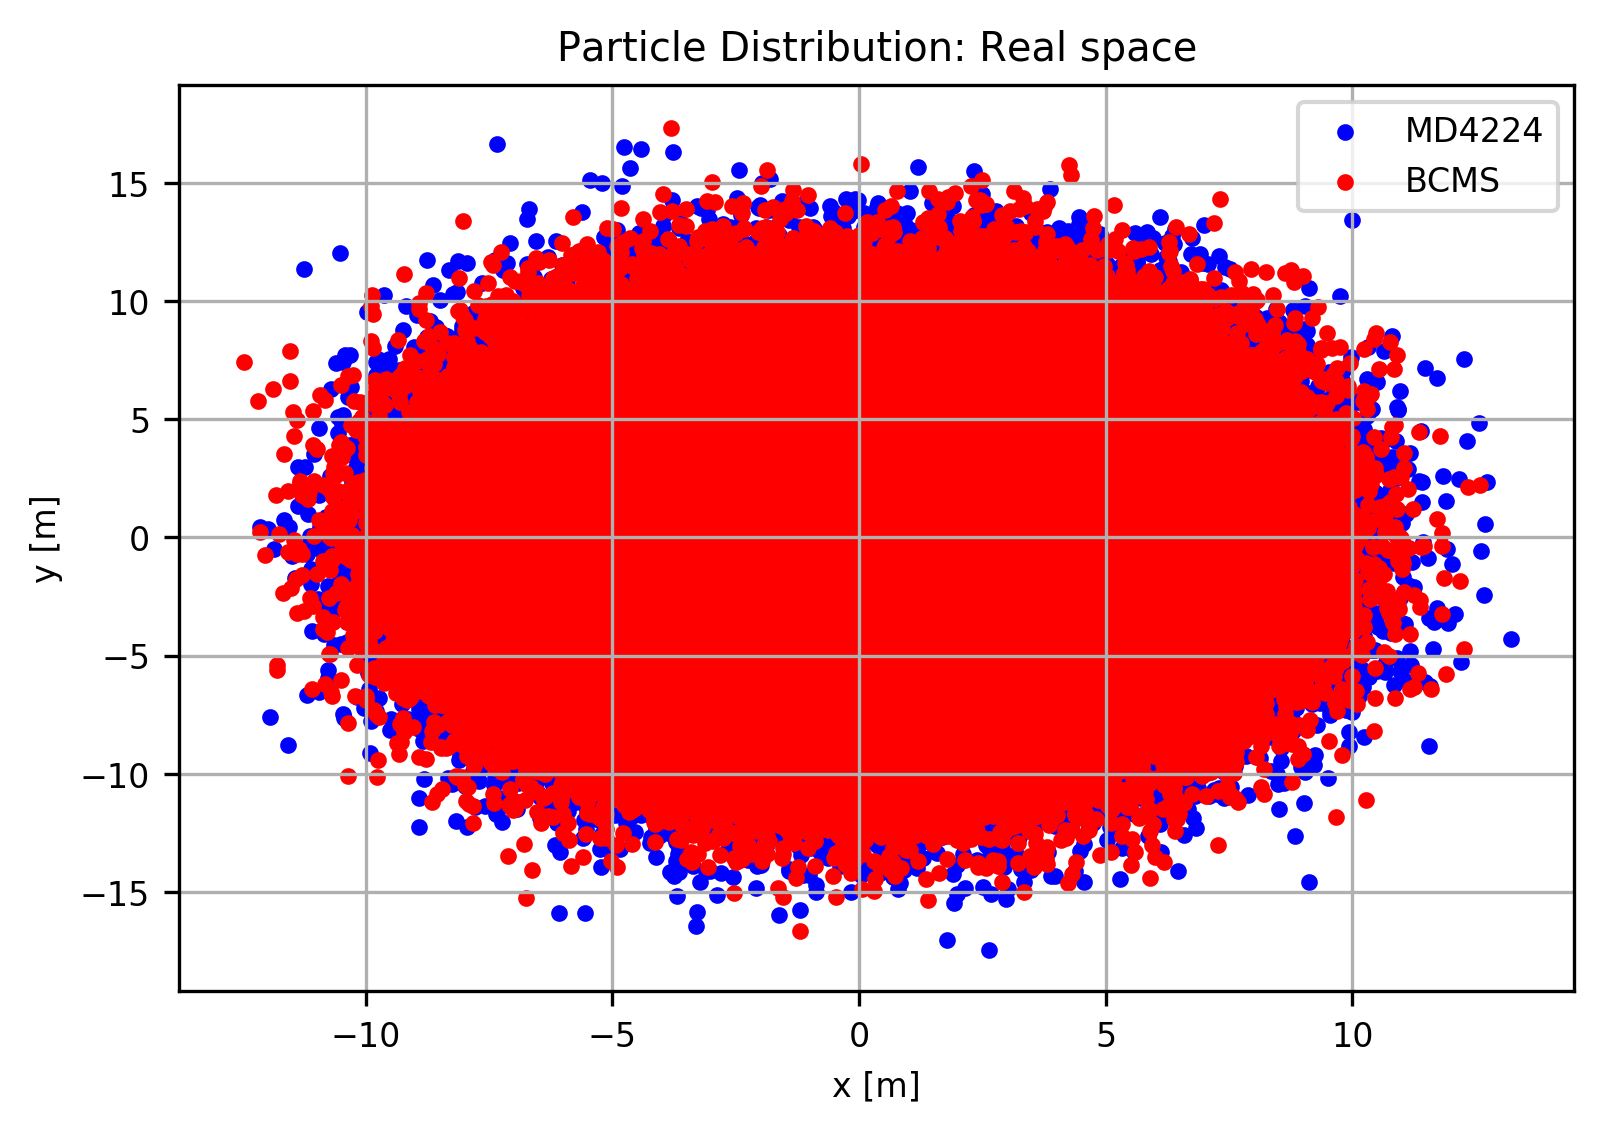

In [25]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

ax1.scatter(MD4224_Bunch['particles']['x'][0][0][0]*1E3, MD4224_Bunch['particles']['y'][0][0][0]*1E3, color='b', label='MD4224', marker='.');
ax1.scatter(BCMS_Bunch['particles']['x'][0][0][0]*1E3, BCMS_Bunch['particles']['y'][0][0][0]*1E3, color='r', label='BCMS', marker='.');

ax1.set_xlabel('x [m]');
ax1.set_ylabel('y [m]');
ax1.set_title('Particle Distribution: Real space');
ax1.grid(True);
ax1.legend();

savename = 'CF_Scatter_x_y.png'
plt.savefig(savename, dpi = 800);

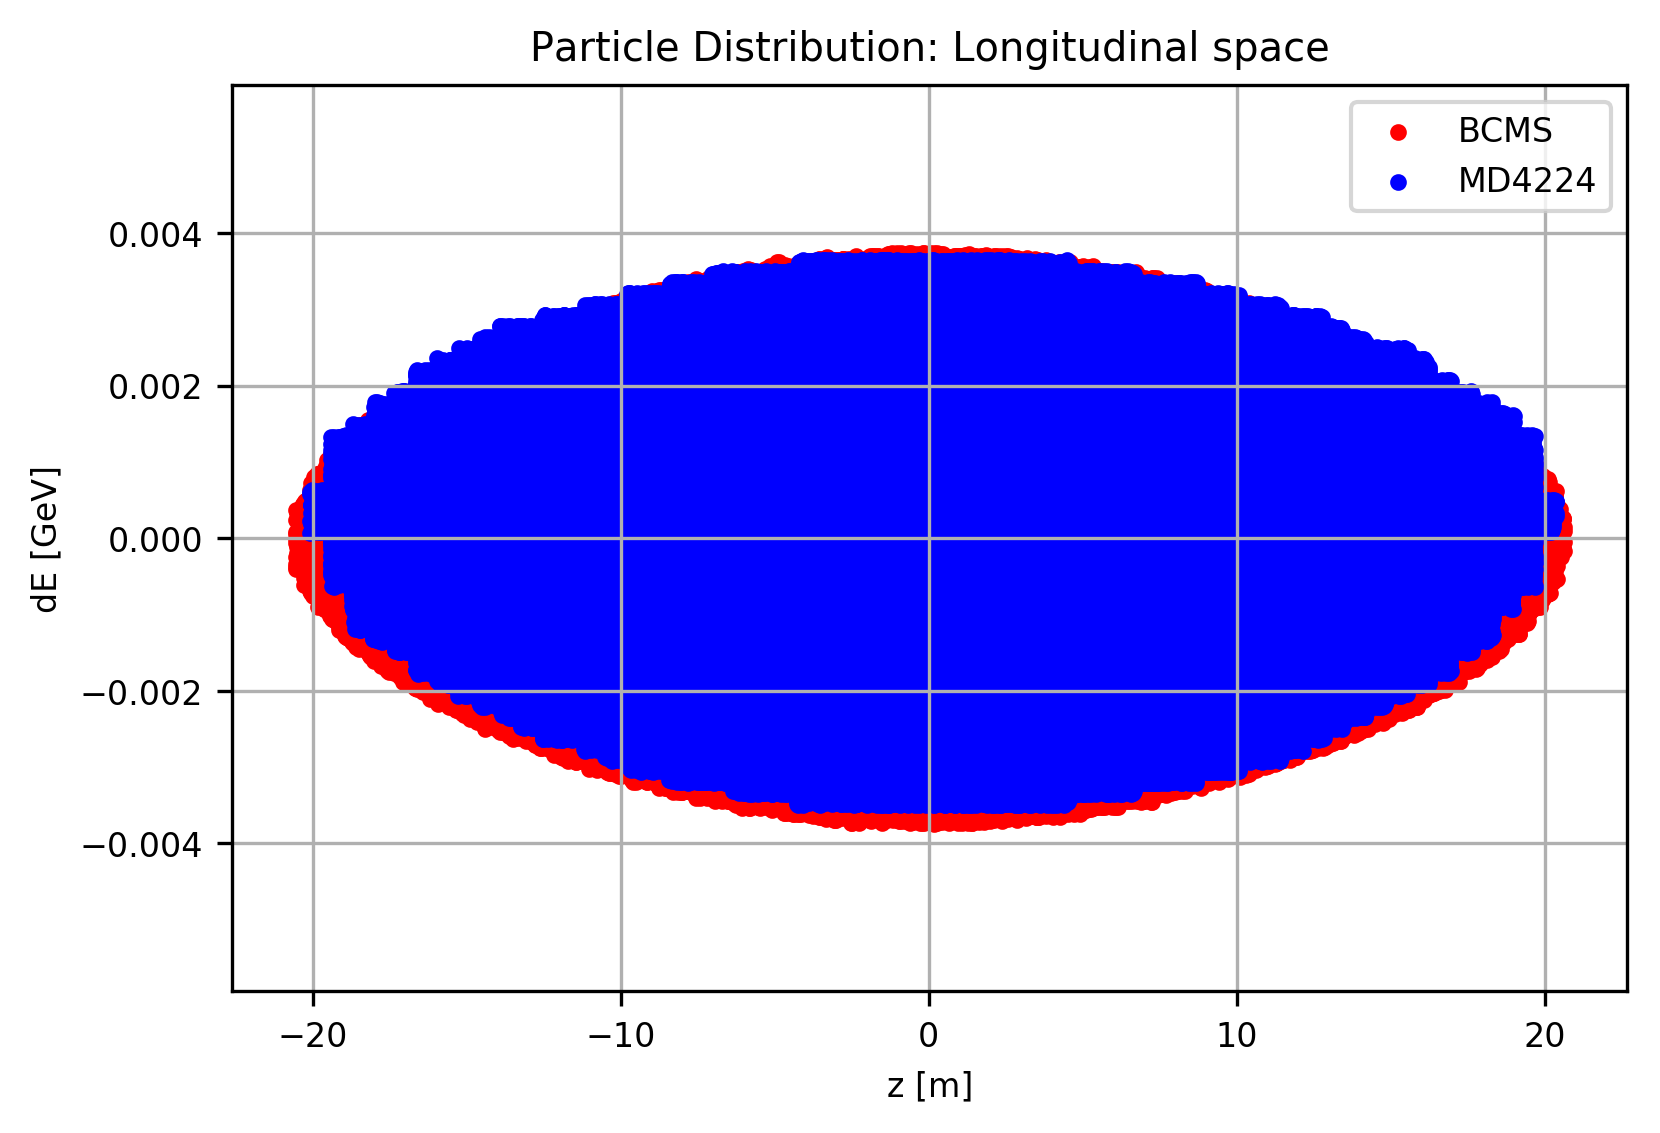

In [24]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

ax1.scatter(BCMS_Bunch['particles']['z'][0][0][0], BCMS_Bunch['particles']['dE'][0][0][0], color='r', label='BCMS', marker='.');
ax1.scatter(MD4224_Bunch['particles']['z'][0][0][0], MD4224_Bunch['particles']['dE'][0][0][0], color='b', label='MD4224', marker='.');

ax1.set_xlabel('z [m]');
ax1.set_ylabel('dE [GeV]');
ax1.set_title('Particle Distribution: Longitudinal space');
ax1.grid(True);
ax1.legend();

savename = 'CF_Scatter_z_dE.png'
plt.savefig(savename, dpi = 800);

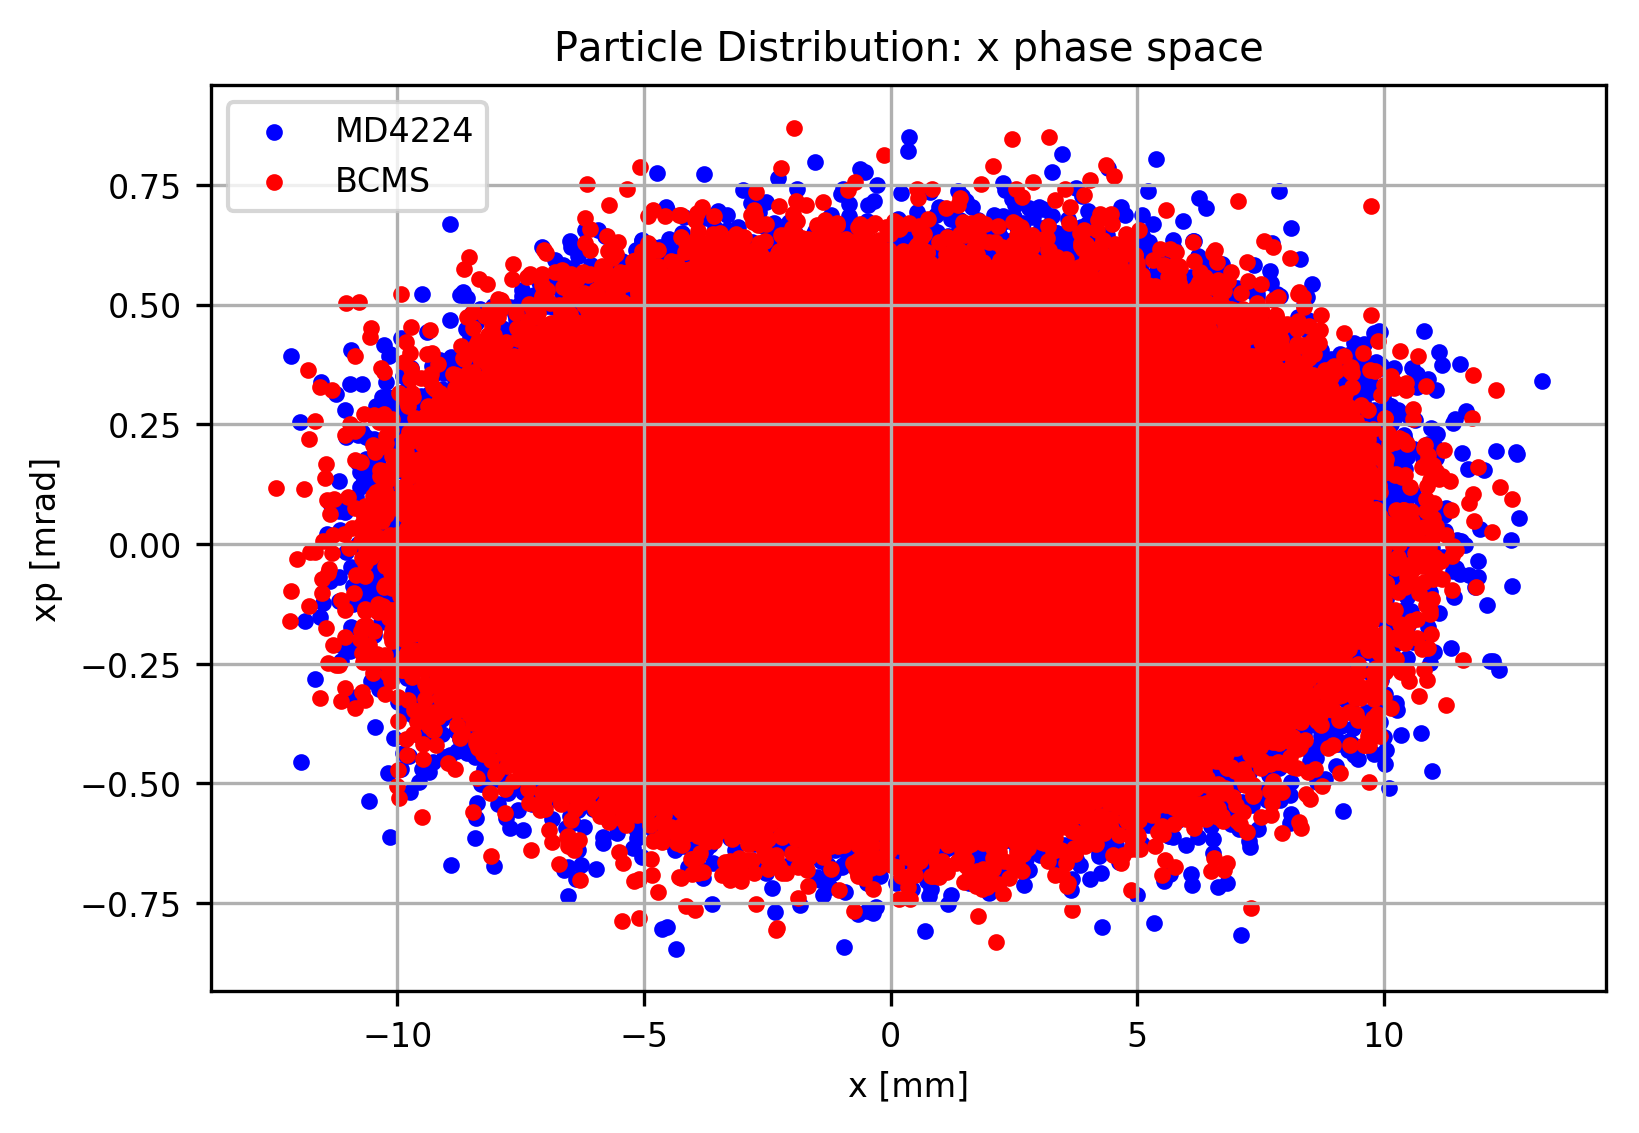

In [26]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

ax1.scatter(MD4224_Bunch['particles']['x'][0][0][0]*1E3, MD4224_Bunch['particles']['xp'][0][0][0]*1E3, color='b', label='MD4224', marker='.');
ax1.scatter(BCMS_Bunch['particles']['x'][0][0][0]*1E3, BCMS_Bunch['particles']['xp'][0][0][0]*1E3, color='r', label='BCMS', marker='.');

ax1.set_xlabel('x [mm]');
ax1.set_ylabel('xp [mrad]');
ax1.set_title('Particle Distribution: x phase space');
ax1.grid(True);
ax1.legend();

savename = 'CF_Scatter_x_xp.png'
plt.savefig(savename, dpi = 800);

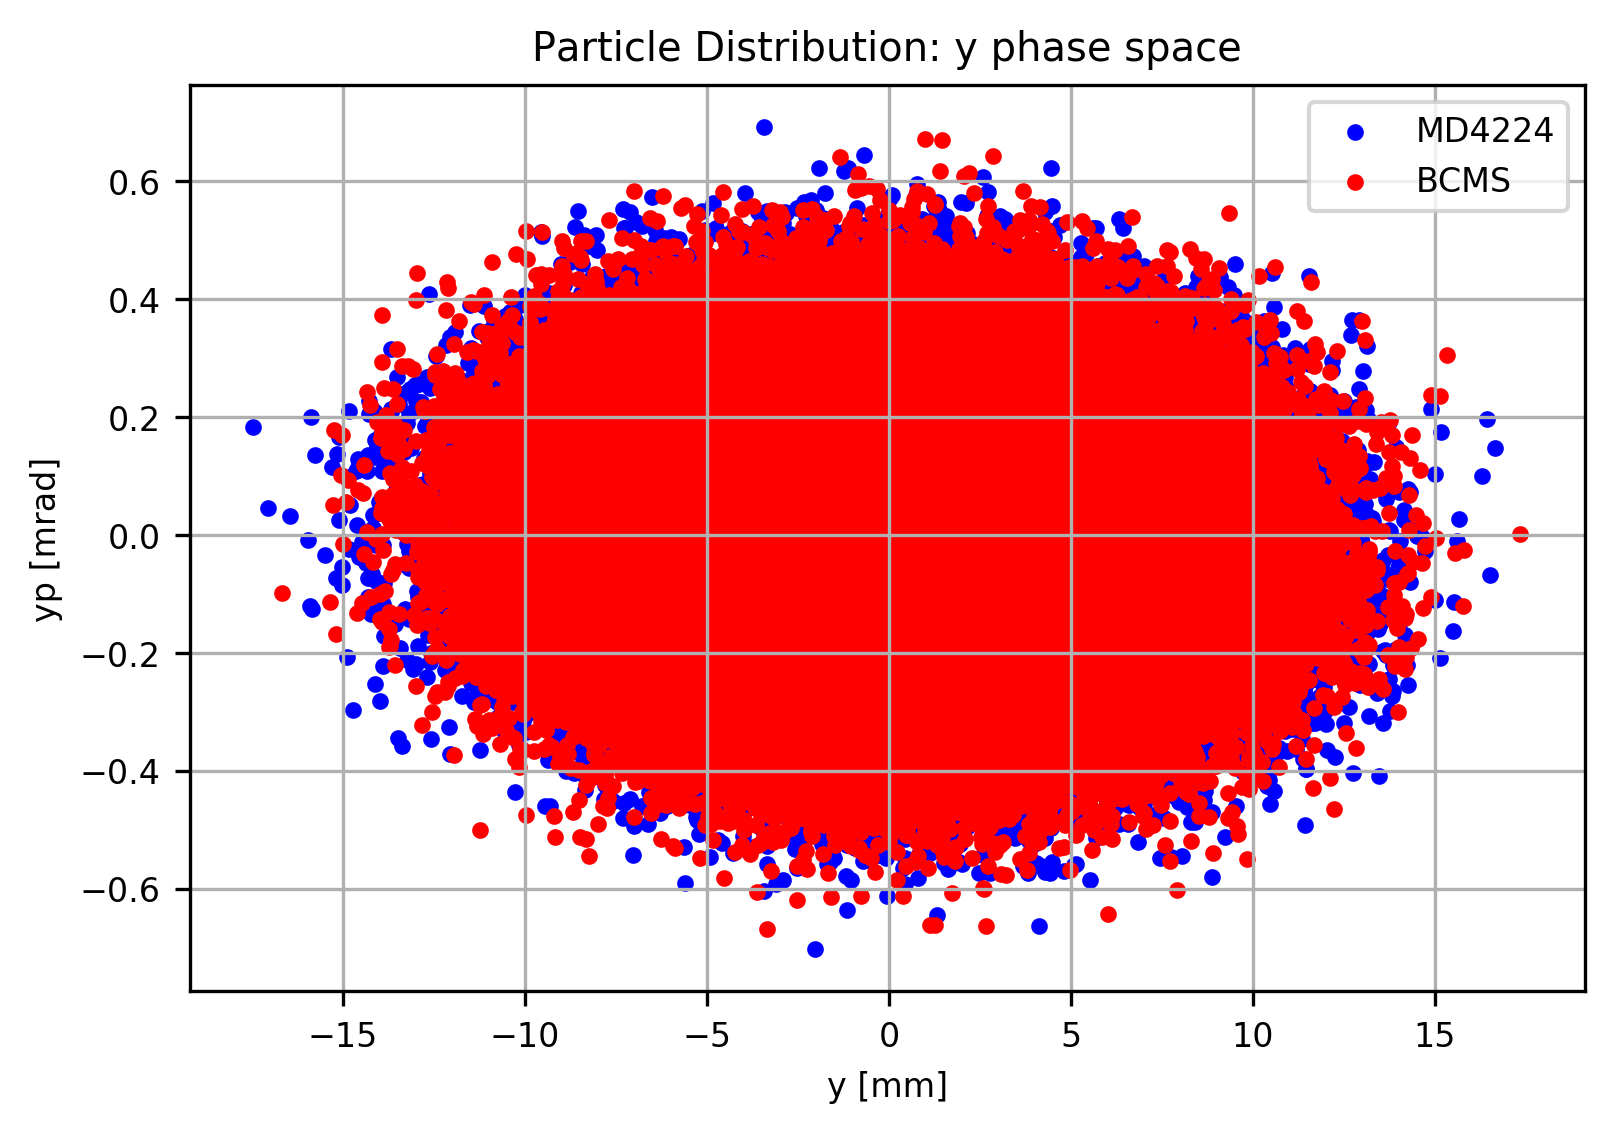

In [27]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

ax1.scatter(MD4224_Bunch['particles']['y'][0][0][0]*1E3, MD4224_Bunch['particles']['yp'][0][0][0]*1E3, color='b', label='MD4224', marker='.');
ax1.scatter(BCMS_Bunch['particles']['y'][0][0][0]*1E3, BCMS_Bunch['particles']['yp'][0][0][0]*1E3, color='r', label='BCMS', marker='.');

ax1.set_xlabel('y [mm]');
ax1.set_ylabel('yp [mrad]');
ax1.set_title('Particle Distribution: y phase space');
ax1.grid(True);
ax1.legend();

savename = 'CF_Scatter_y_yp.png'
plt.savefig(savename, dpi = 800);